In [1]:
%pylab inline
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
data_t0 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 0])
data_t1 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 1])
data_t2 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 2])

Populating the interactive namespace from numpy and matplotlib


# Entropy

Entropy - the amount of 'randomness' or 'surprise' in data.

Some code excerpts take [from here](http://nbviewer.ipython.org/github/fonnesbeck/Bios366/blob/master/notebooks/Section6_5-Decision-Trees.ipynb)

Shannon's 1948 paper [A Mathematical Theory of Communication](http://worrydream.com/refs/Shannon%20-%20A%20Mathematical%20Theory%20of%20Communication.pdf) is cited as the foundation of info theory.

Shannon's paper cites Hartley's [Transmission of Information (1928)](http://www3.alcatel-lucent.com/bstj/vol07-1928/articles/bstj7-3-535.pdf) as the originator of using the `log` function to model information for three reasons:

* Practicality. most technical system's capacity follows the log function
* Intuition.  Similar to the first, we think "two punched cards should have twice the capacity of one for information storage"
* Cleaner.  The limits of probability happen to match the limits of the log function.


In [18]:
import numpy as np
entropy = lambda p: -p * np.log2(p) if p > 0. else 0

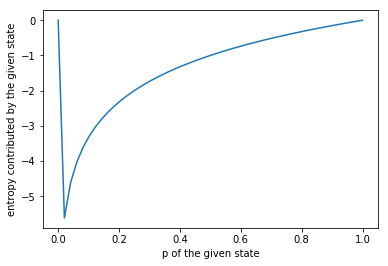

In [19]:
figure(5)
xlabel("p of the given state")
ylabel("entropy contributed by the given state")
pvals = np.linspace(0, 1)  
plot(pvals, [entropy(p) for p in list(pvals)])

In [4]:
print "entropy(0.4) =", entropy(0.4)
print "entropy(0.5) =", entropy(0.5)
print "entropy(0.6) =", entropy(0.6)

entropy(0.4) = 0.528771237955
entropy(0.5) = 0.5
entropy(0.6) = 0.4421793565


In [5]:
print entropy(0.5) + entropy(0.5)
print entropy(0.25) + entropy(0.75)

print "even three states:", entropy(0.333333333333) + entropy(0.333333333333) + entropy(0.333333333333)
print "[0,49,5]",entropy(49./54)+entropy(5./54)

1.0
0.811278124459
even three states: 1.58496250072
[0,49,5] 0.445064857051


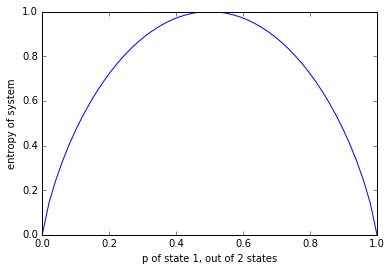

In [6]:
figure(6)
xlabel("p of state 1, out of 2 states")
ylabel("entropy of system")
pvals = np.linspace(0, 1)  
plot(pvals, [entropy(p)+entropy(1-p) for p in list(pvals)])

In [7]:
def value_entropy(list_of_number_of_occurrences):
    def entropy(s):
    res = 0
    val, counts = np.unique(s, return_counts=True)
    freqs = counts.astype('float')/len(s)
    for p in freqs:
        if p != 0.0:
            res -= p * np.log2(p)
    return res
    total_N = sum(list_of_number_of_occurrences)
    
    if total_N == 0:
        return 0.
    
    total_entropy = 0.
    for state in list_of_number_of_occurrences:
        total_entropy += entropy(float(state)/total_N)
    
    return total_entropy

In [8]:
l1 = [2,2,2,2]
l2 = [0,0,4,4]
l3 = [1,2,3,4]
l4 = [8,0,0,0]

print "l1",l1,entropy_of_list(l1)
print "l2",l2,entropy_of_list(l2)
print "l3",l3,entropy_of_list(l3)
print 'l4',l4,entropy_of_list(l4)


l1 [2, 2, 2, 2] 2.0
l2 [0, 0, 4, 4] 1.0
l3 [1, 2, 3, 4] 1.84643934467
l4 [8, 0, 0, 0] 0.0


(0, 2.6)

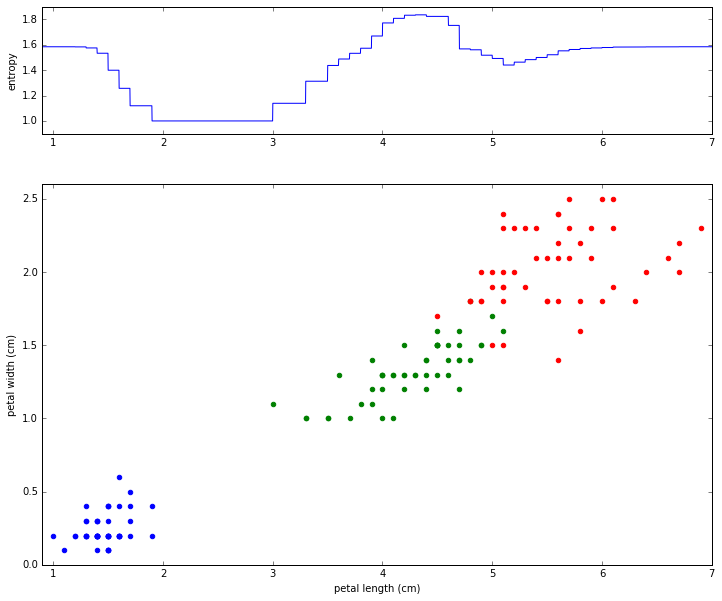

In [9]:
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# entropy_of_list()

step = 0.001

data_d2l = np.array([[row[2],iris.target[i]] for i,row in enumerate(iris.data)])
e_x = np.arange(0.9,7+step,step)
entropies = []
for cutoff in e_x:
    left_list = [int(c) for [x,c] in data_d2l if x < cutoff]
    right_list = [int(c) for [x,c] in data_d2l if x >= cutoff]
    
    left_counts = [0,0,0]
    for c in left_list:
        left_counts[c] += 1
    
    right_counts = [0,0,0]
    for c in right_list:
        right_counts[c] += 1
    
    left_entropy = entropy_of_list(left_counts)
    right_entropy = entropy_of_list(right_counts)

    entropies.append(left_entropy + right_entropy)
    
# plot it
fig = figure(10,figsize=(12, 10)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3]) 
ax0 = subplot(gs[0])
ax0.plot(e_x,entropies)
ax0.set_ylabel("entropy")
ax0.set_xlim([0.9,7.])
ax0.set_ylim([0.9,1.9])



ax1 = subplot(gs[1])
ax1.scatter(data_t0[:,2], data_t0[:,3], color = 'b', label=iris.target_names[0])
ax1.scatter(data_t1[:,2], data_t1[:,3], color = 'g', label=iris.target_names[1])
ax1.scatter(data_t2[:,2], data_t2[:,3], color = 'r', label=iris.target_names[2])
ax1.set_xlabel("petal length (cm)")
ax1.set_ylabel("petal width (cm)")
ax1.set_xlim([0.9,7.])
ax1.set_ylim([0,2.6])


